In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [80]:
#Read Dataset
dataset = pd.read_csv('C:\\Users\\KAVITA\\Project\\assam\\jorhat_as.csv')

In [81]:
#Check 
dataset.head()

,state_code,district_code,rural_urban,stratum,PSU_ID,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,day_or_mn_for_breast_feeding_cd,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type
0,ASSAM,JORHAT,Rural,population>=2000,1034580,89,1,26-04-14,30,More than or equal to 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ASSAM,JORHAT,Rural,population>=2000,1034815,89,1,26-04-14,30,More than or equal to 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ASSAM,JORHAT,Rural,population>=2000,1034098,90,1,26-04-14,30,More than or equal to 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ASSAM,JORHAT,Rural,population>=2000,1034190,90,1,26-04-14,30,More than or equal to 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ASSAM,JORHAT,Rural,population>=2000,1034736,90,1,26-04-14,30,More than or equal to 15 PPM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#drop unwanted columns
dataset.drop(['state_code', 'district_code','PSU_ID',
       'ahs_house_unit', 'house_hold_no', 'date_survey','sl_no','usual_residance_Reason', 'identification_code',
               'date_of_birth', 'month_of_birth', 'year_of_birth','Weight_measured','Length_height_measured',
       'length_height_code','Haemoglobin_test',
       'Haemoglobin',], axis = 1, inplace = True) 

In [86]:
df=dataset
print(dataset)

     rural_urban           stratum  test_salt_iodine  \
0          Rural  population>=2000                30   
1          Rural  population>=2000                30   
2          Rural  population>=2000                30   
3          Rural  population>=2000                30   
4          Rural  population>=2000                30   
...          ...               ...               ...   
8185       Rural  population>=2000                30   
8186       Rural  population>=2000                30   
8187       Urban             Urban                30   
8188       Urban             Urban                30   
8189       Urban             Urban                30   

                record_code_iodine  record_code_iodine_reason     Sex  \
0     More than or equal to 15 PPM                        NaN    Male   
1     More than or equal to 15 PPM                        NaN  Female   
2     More than or equal to 15 PPM                        NaN    Male   
3     More than or equal to 15 PPM 

In [87]:
#Check null values
dataset.isnull().sum()

rural_urban                           0
stratum                               0
test_salt_iodine                      0
record_code_iodine                    0
record_code_iodine_reason          8190
Sex                                   0
usual_residance                       0
Age_Code                              0
Age                                   0
Weight_in_kg                       1122
Length_height_cm                   1177
Haemoglobin_level                  2001
BP_systolic                        3157
BP_systolic_2_reading              3157
BP_Diastolic                       3157
BP_Diastolic_2reading              3157
Pulse_rate                         3157
Pulse_rate_2_reading               3157
Diabetes_test                      2737
fasting_blood_glucose              2737
fasting_blood_glucose_mg_dl        3213
Marital_status                     5890
gauna_perfor_not_perfor            6675
duration_pregnanacy                7890
first_breast_feeding               7892


In [90]:
df = df.fillna(0)

In [91]:
df.corr()

,test_salt_iodine,record_code_iodine_reason,Age,Weight_in_kg,Length_height_cm,Haemoglobin_level,BP_systolic,BP_systolic_2_reading,BP_Diastolic,BP_Diastolic_2reading,...,Pulse_rate_2_reading,fasting_blood_glucose_mg_dl,duration_pregnanacy,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_duration
test_salt_iodine,1.000000,NaN,0.070122,0.099237,0.053287,0.062884,0.062134,0.064773,0.044553,0.047323,...,0.044200,0.055833,0.016099,0.005131,0.004490,0.005618,0.003818,0.003609,0.002436,0.004555
record_code_iodine_reason,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,0.070122,NaN,1.000000,0.314594,0.139159,0.058227,0.618366,0.617162,0.587409,0.587169,...,0.547228,0.572615,-0.040318,-0.278623,-0.261980,-0.260159,-0.261841,-0.260696,-0.259423,-0.127176
Weight_in_kg,0.099237,NaN,0.314594,1.000000,0.860562,0.542030,0.751057,0.752128,0.757204,0.757995,...,0.722132,0.715023,0.059846,-0.238023,-0.217436,-0.215784,-0.216059,-0.214388,-0.212743,-0.108853
Length_height_cm,0.053287,NaN,0.139159,0.860562,1.000000,0.635807,0.636220,0.638070,0.637881,0.640747,...,0.634246,0.618100,0.071288,-0.171601,-0.153859,-0.152863,-0.152794,-0.151452,-0.150137,-0.076118
Haemoglobin_level,0.062884,NaN,0.058227,0.542030,0.635807,1.000000,0.395300,0.396418,0.395739,0.398033,...,0.385409,0.400833,0.028552,-0.082627,-0.053258,-0.053844,-0.052222,-0.049279,-0.045848,-0.018804
BP_systolic,0.062134,NaN,0.618366,0.751057,0.636220,0.395300,1.000000,0.998118,0.981092,0.981608,...,0.943245,0.907943,0.091032,-0.228324,-0.213130,-0.211724,-0.212426,-0.211014,-0.209297,-0.106201
BP_systolic_2_reading,0.064773,NaN,0.617162,0.752128,0.638070,0.396418,0.998118,1.000000,0.980733,0.982619,...,0.944870,0.908544,0.092470,-0.228596,-0.213383,-0.211976,-0.212679,-0.211264,-0.209545,-0.106328
BP_Diastolic,0.044553,NaN,0.587409,0.757204,0.637881,0.395739,0.981092,0.980733,1.000000,0.998133,...,0.950126,0.901410,0.092453,-0.227967,-0.212797,-0.211393,-0.212094,-0.210684,-0.208969,-0.106035
BP_Diastolic_2reading,0.047323,NaN,0.587169,0.757995,0.640747,0.398033,0.981608,0.982619,0.998133,1.000000,...,0.953301,0.903869,0.095705,-0.228798,-0.213573,-0.212164,-0.212868,-0.211452,-0.209731,-0.106422


In [92]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df.iloc[:,0] = label_encoder.fit_transform(df.iloc[:,0]).astype('float64')

In [95]:
df.Age_Code[df.Age_Code == 'Year'] = 1
df.Age_Code[df.Age_Code == 'Months'] = 2

In [96]:
df

,rural_urban,stratum,test_salt_iodine,record_code_iodine,record_code_iodine_reason,Sex,usual_residance,Age_Code,Age,Weight_in_kg,...,day_or_mn_for_breast_feeding_cd,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type
0,Rural,population>=2000,30,More than or equal to 15 PPM,0.0,Male,YES,1,22,41.200001,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1,Rural,population>=2000,30,More than or equal to 15 PPM,0.0,Female,YES,1,14,27.900000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2,Rural,population>=2000,30,More than or equal to 15 PPM,0.0,Male,YES,1,60,51.599998,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
3,Rural,population>=2000,30,More than or equal to 15 PPM,0.0,Female,YES,1,48,37.900002,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
4,Rural,population>=2000,30,More than or equal to 15 PPM,0.0,Male,YES,1,17,41.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,Rural,population>=2000,30,More than or equal to 15 PPM,0.0,Male,YES,1,45,44.500000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
8186,Rural,population>=2000,30,More than or equal to 15 PPM,0.0,Female,YES,1,40,34.400002,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
8187,Urban,Urban,30,More than or equal to 15 PPM,0.0,Female,YES,1,22,43.900002,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
8188,Urban,Urban,30,More than or equal to 15 PPM,0.0,Female,YES,1,18,43.500000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


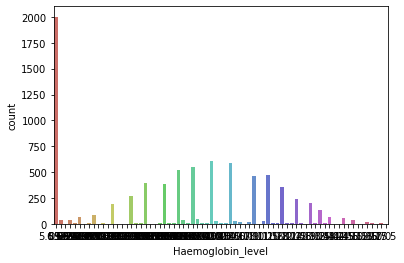

In [97]:
df.Haemoglobin_level.value_counts()
sns.countplot(x = 'Haemoglobin_level', data = df, palette = 'hls')
plt.show()
                


In [99]:
X = df[['rural_urban', 'stratum', 'test_salt_iodine', 'record_code_iodine','record_code_iodine_reason', 'Sex', 'usual_residance', 'Age_Code',
       'Age', 'Weight_in_kg', 'Length_height_cm', 'Haemoglobin_level',
       'BP_systolic', 'BP_systolic_2_reading', 'BP_Diastolic',
       'BP_Diastolic_2reading', 'Pulse_rate', 'Pulse_rate_2_reading',
       'Diabetes_test', 'fasting_blood_glucose', 'fasting_blood_glucose_mg_dl',
       'Marital_status', 'gauna_perfor_not_perfor', 'duration_pregnanacy',
       'first_breast_feeding', 'is_cur_breast_feeding',
       'day_or_mn_for_breast_feeding_cd', 'day_or_month_for_breast_feeding',
       'water_month', 'ani_milk_month', 'semisolid_month_or_day',
       'solid_month', 'vegetables_month_or_day', 'illness_type',
       'illness_duration', 'treatment_type']]
y = df['Haemoglobin_level']

In [103]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)


In [105]:
X_test

,rural_urban,stratum,test_salt_iodine,record_code_iodine,record_code_iodine_reason,Sex,usual_residance,Age_Code,Age,Weight_in_kg,...,day_or_mn_for_breast_feeding_cd,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type
2182,Rural,200<population<2000,30,More than or equal to 15 PPM,0.0,Male,YES,1,29,50.500000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
574,Rural,population>=2000,7,Less than 15 PPM,0.0,Male,YES,1,38,42.099998,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1132,Rural,200<population<2000,30,More than or equal to 15 PPM,0.0,Female,YES,1,38,53.599998,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
6968,Rural,population>=2000,30,More than or equal to 15 PPM,0.0,Female,YES,1,12,32.099998,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1103,Rural,200<population<2000,30,More than or equal to 15 PPM,0.0,Female,YES,1,6,20.600000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4730,Rural,200<population<2000,30,More than or equal to 15 PPM,0.0,Female,YES,1,40,47.599998,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2641,Rural,population>=2000,30,More than or equal to 15 PPM,0.0,Female,YES,1,21,42.599998,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
5227,Rural,200<population<2000,30,More than or equal to 15 PPM,0.0,Female,YES,1,38,40.799999,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
7923,Urban,Urban,30,More than or equal to 15 PPM,0.0,Male,YES,1,3,13.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,No illness,0.0,0


In [106]:
logreg = LogisticRegression()


In [107]:
logreg.fit(X_train,y_train)

ValueError: could not convert string to float: 'YES'